In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# set random seed for reproducibility

torch.manual_seed(42)

In [ ]:
## Check GPU

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using Device: {device}")

Using Device: cuda


In [ ]:
# Dataset link:
# https://www.kaggle.com/datasets/zalando-research/fashionmnist?resource=download

In [ ]:
df = pd.read_csv("/content/fashion-mnist_train.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Label ---> target class
785 --> columns

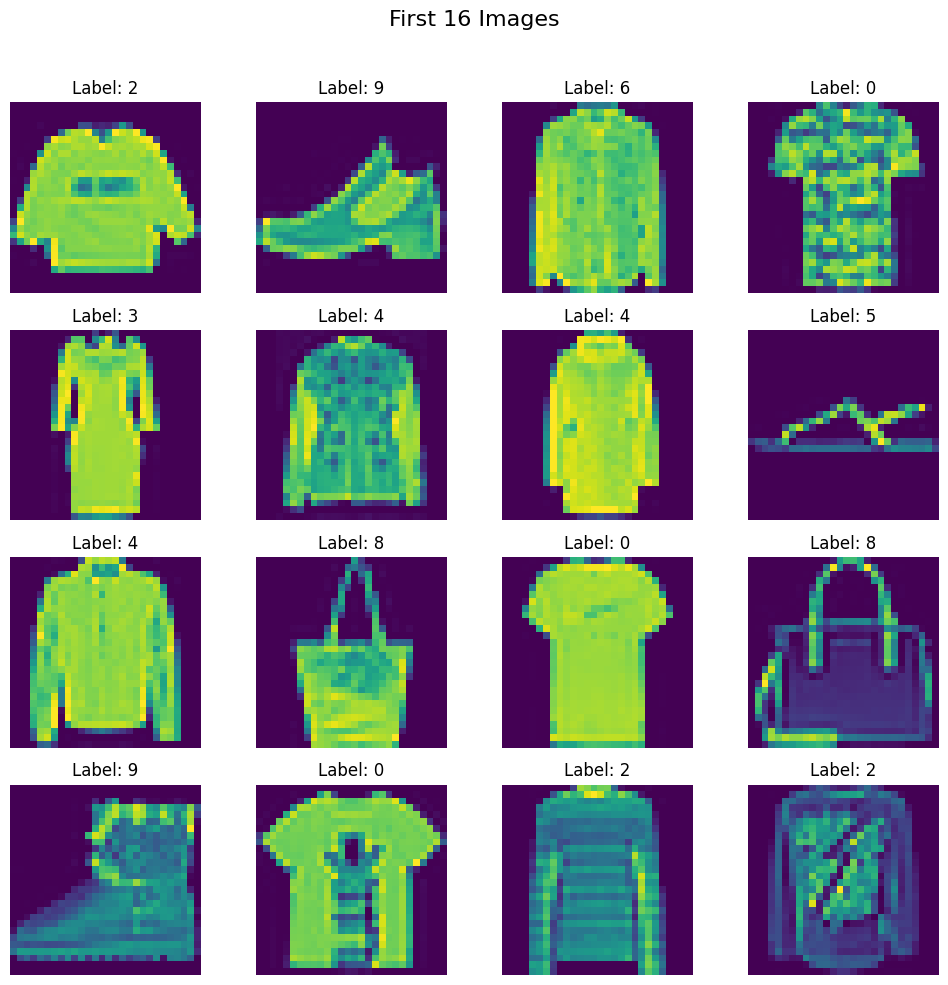

In [ ]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [ ]:
# train test split

X = df.iloc[:,1:].values
y = df.iloc[:,0].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

In [ ]:
# scaling the features

X_train = X_train/255.0    # bcuz of pixel size b/w (0-255)
X_test = X_test/255.0

In [ ]:
# create CustomDataset Class

class CustomDataset(Dataset):

    def __init__(self,features,labels):

        self.features = torch.tensor(features, dtype = torch.float32)
        self.labels = torch.tensor(labels, dtype = torch.long)

    def __len__(self): # count no. of rows

        return len(self.features)
# So if you have 60,000 images in Fashion-MNIST, __len__ will return 60,000.
# It’s just telling PyTorch: “Hey, there are 60,000 samples here in total.”

    def __getitem__(self,index): # fetching one item by index

        return self.features[index], self.labels[index]

# When PyTorch wants a particular piece of data (like the 5th image and label),
# __getitem__ is the function that hands over that single image and its label.


In [ ]:
# create train_dataset object
train_dataset = CustomDataset(X_train, y_train)

# create test_dataset object
test_dataset = CustomDataset(X_test,y_test)

In [ ]:
len(train_dataset)

48000

In [ ]:
# create train and test loader

train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True, pin_memory = True) #
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = False, pin_memory= True)

# pin_memory --> increases the speed of training on GPU

### Design Neural Network Architecture:

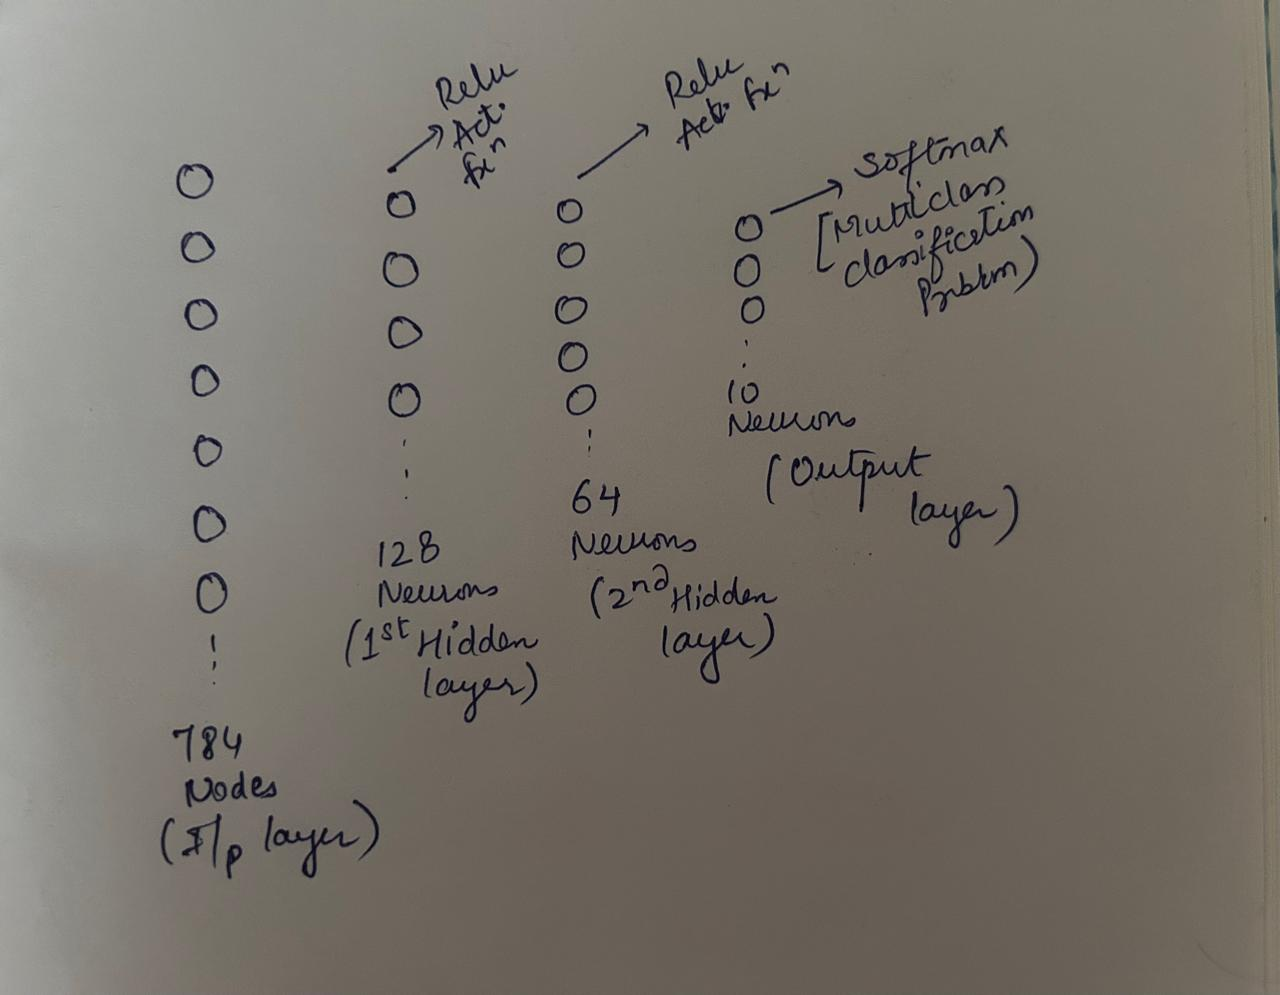

In [ ]:
# define NN Class

class MyNN(nn.Module):

    def __init__(self,num_features):

        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )
    def forward(self,x):

        return self.model(x)



### Initialize Parameters:

In [ ]:
# set learning rate and epochs

epochs = 100
learning_rate = 0.1

In [ ]:
X_train.shape

(48000, 784)

In [ ]:
# initiate the model
model = MyNN(X_train.shape[1])

# Move the Device to GPU
model.to(device)

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)



In [ ]:
len(train_loader)

1500

In [ ]:
## training loop

for epoch in range(epochs):
    total_epoch_loss = 0

    # modify the training loop by moving data to GPU
    for batch_features, batch_labels in train_loader:


        # modify the training loop by moving data to GPU
        batch_features, batch_labels =  batch_features.to(device), batch_labels.to(device)


        # forward pass
        outputs = model(batch_features)


        # calculate loss
        loss = criterion(outputs, batch_labels)


        # zero gradients
        optimizer.zero_grad()


        # backward pass
        loss.backward()


        # update weights
        optimizer.step()

        total_epoch_loss = total_epoch_loss + loss.item()


    avg_loss = total_epoch_loss/len(train_loader)
    print(f"Epoch: {epoch+1}, Loss: {avg_loss}")






Epoch: 1, Loss: 0.637534214446942
Epoch: 2, Loss: 0.43096413088341556
Epoch: 3, Loss: 0.38776859869559605
Epoch: 4, Loss: 0.3586657988280058
Epoch: 5, Loss: 0.33963660384714606
Epoch: 6, Loss: 0.32304014546920856
Epoch: 7, Loss: 0.30772140151758987
Epoch: 8, Loss: 0.29805163546899954
Epoch: 9, Loss: 0.28414913012832405
Epoch: 10, Loss: 0.27700232282280923
Epoch: 11, Loss: 0.2671942338421941
Epoch: 12, Loss: 0.25814817342783014
Epoch: 13, Loss: 0.2506980240481595
Epoch: 14, Loss: 0.24593632372965415
Epoch: 15, Loss: 0.23949053258324662
Epoch: 16, Loss: 0.23083305982500316
Epoch: 17, Loss: 0.2277292023661236
Epoch: 18, Loss: 0.2184666348018994
Epoch: 19, Loss: 0.2165429878445963
Epoch: 20, Loss: 0.2097967039036254
Epoch: 21, Loss: 0.2064008676589777
Epoch: 22, Loss: 0.19970217662180464
Epoch: 23, Loss: 0.19729097264880935
Epoch: 24, Loss: 0.1924908109928171
Epoch: 25, Loss: 0.18724834281392397
Epoch: 26, Loss: 0.18350460652882855
Epoch: 27, Loss: 0.1787385233292977
Epoch: 28, Loss: 0.175

In [ ]:
# evaluation

model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # modify the evaluation loop by moving data to GPU
    batch_features, batch_labels =  batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)


0.8905833333333333
